# Wholesale Gasoline Price Prediciton

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("LOTOS.csv")
df["Date"] = pd.to_datetime(df["Date"])
df.head()

,Date,Price,Excise,Surcharge
0,2004-01-01,2530.0,1514.0,79.28
1,2004-01-08,2580.0,1514.0,79.28
2,2004-01-13,2615.0,1514.0,79.28
3,2004-01-16,2615.0,1514.0,79.28
4,2004-01-21,2650.0,1514.0,79.28


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4527 entries, 0 to 4526
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4527 non-null   datetime64[ns]
 1   Price      4527 non-null   float64       
 2   Excise     4527 non-null   float64       
 3   Surcharge  4527 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 141.6 KB


In [4]:
df.describe()

,Price,Excise,Surcharge
count,4527.000000,4527.000000,4527.000000
mean,3733.120168,1528.269052,111.710241
std,702.738072,65.360465,26.923067
min,2428.000000,1315.000000,79.280000
25%,3304.000000,1540.000000,87.400000
50%,3588.000000,1540.000000,103.160000
75%,4123.000000,1565.000000,131.400000
max,7521.000000,1565.000000,165.140000


In [5]:
working = df.loc[3000:]
working.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1527 entries, 3000 to 4526
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1527 non-null   datetime64[ns]
 1   Price      1527 non-null   float64       
 2   Excise     1527 non-null   float64       
 3   Surcharge  1527 non-null   float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 47.8 KB


In [6]:
import matplotlib.dates as mdate

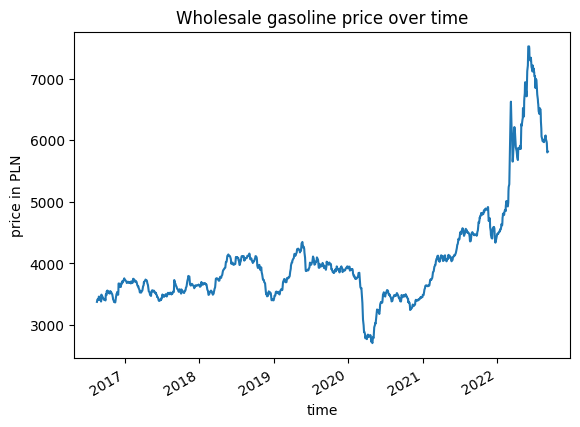

In [7]:
plt.plot(working["Date"], working["Price"])
plt.rcParams['figure.figsize'] = [20, 12]
plt.title("Wholesale gasoline price over time")


locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator(locator)

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("price in PLN")
plt.show()

In [8]:
from pandas.plotting import lag_plot

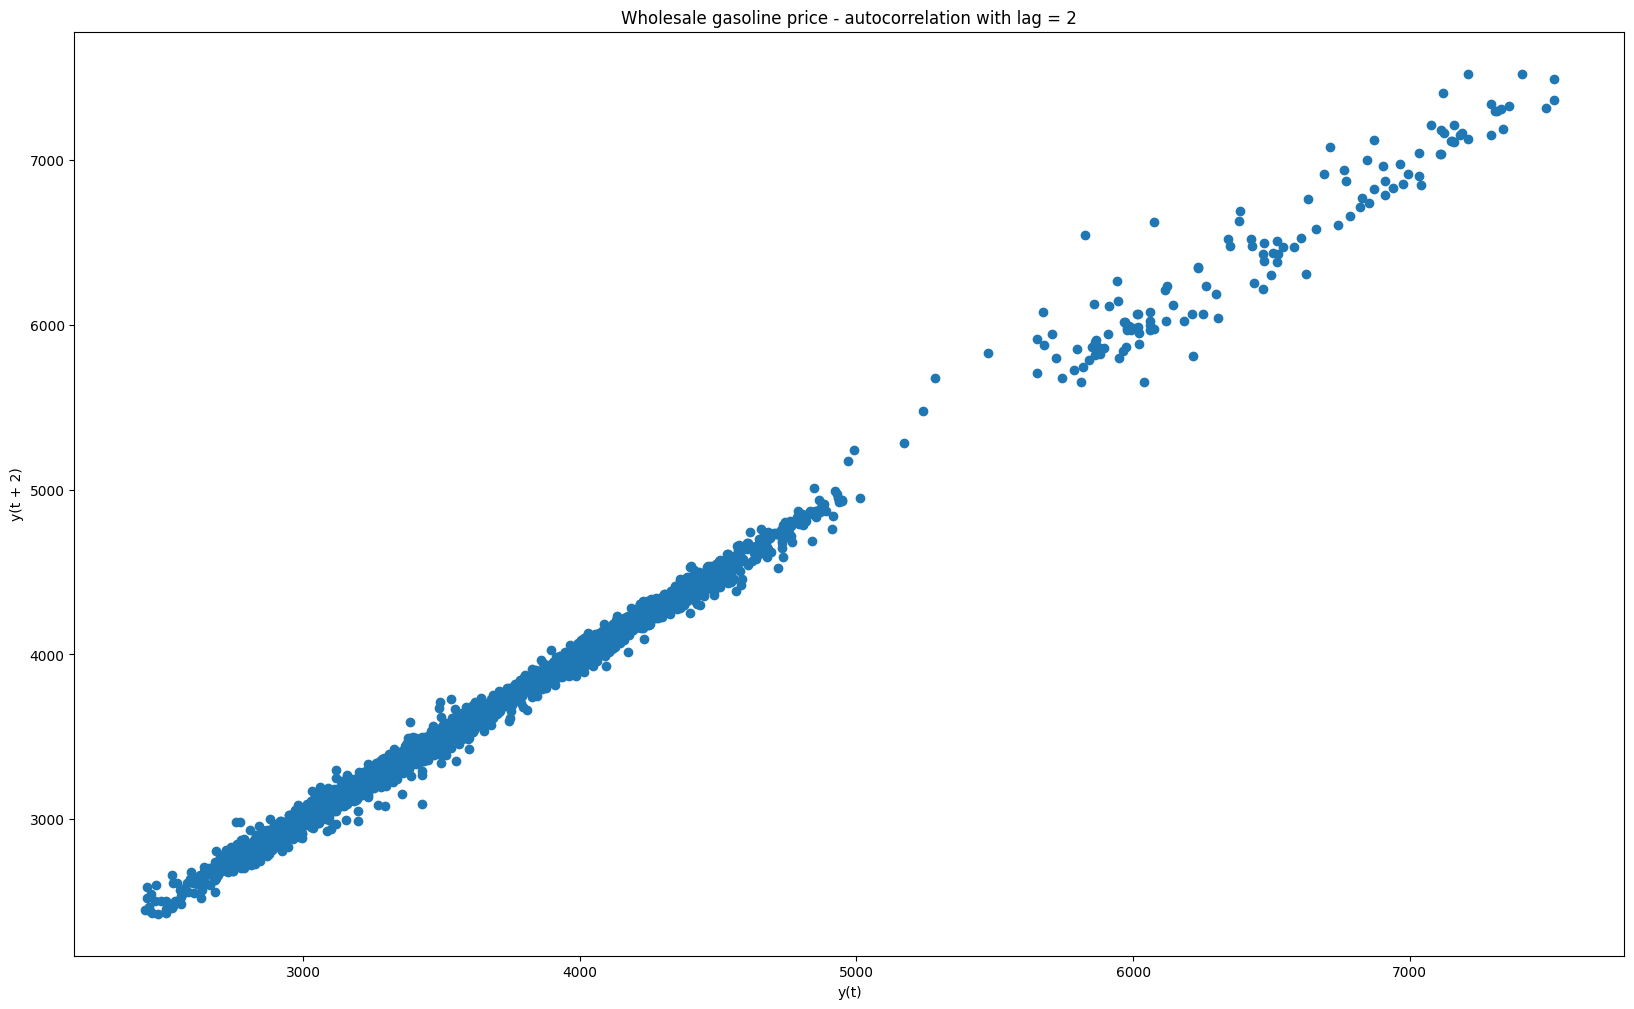

In [9]:
lag = 2

plt.figure()
lag_plot(df["Price"], lag = lag)
plt.title(f"Wholesale gasoline price - autocorrelation with lag = {lag}")
plt.show()

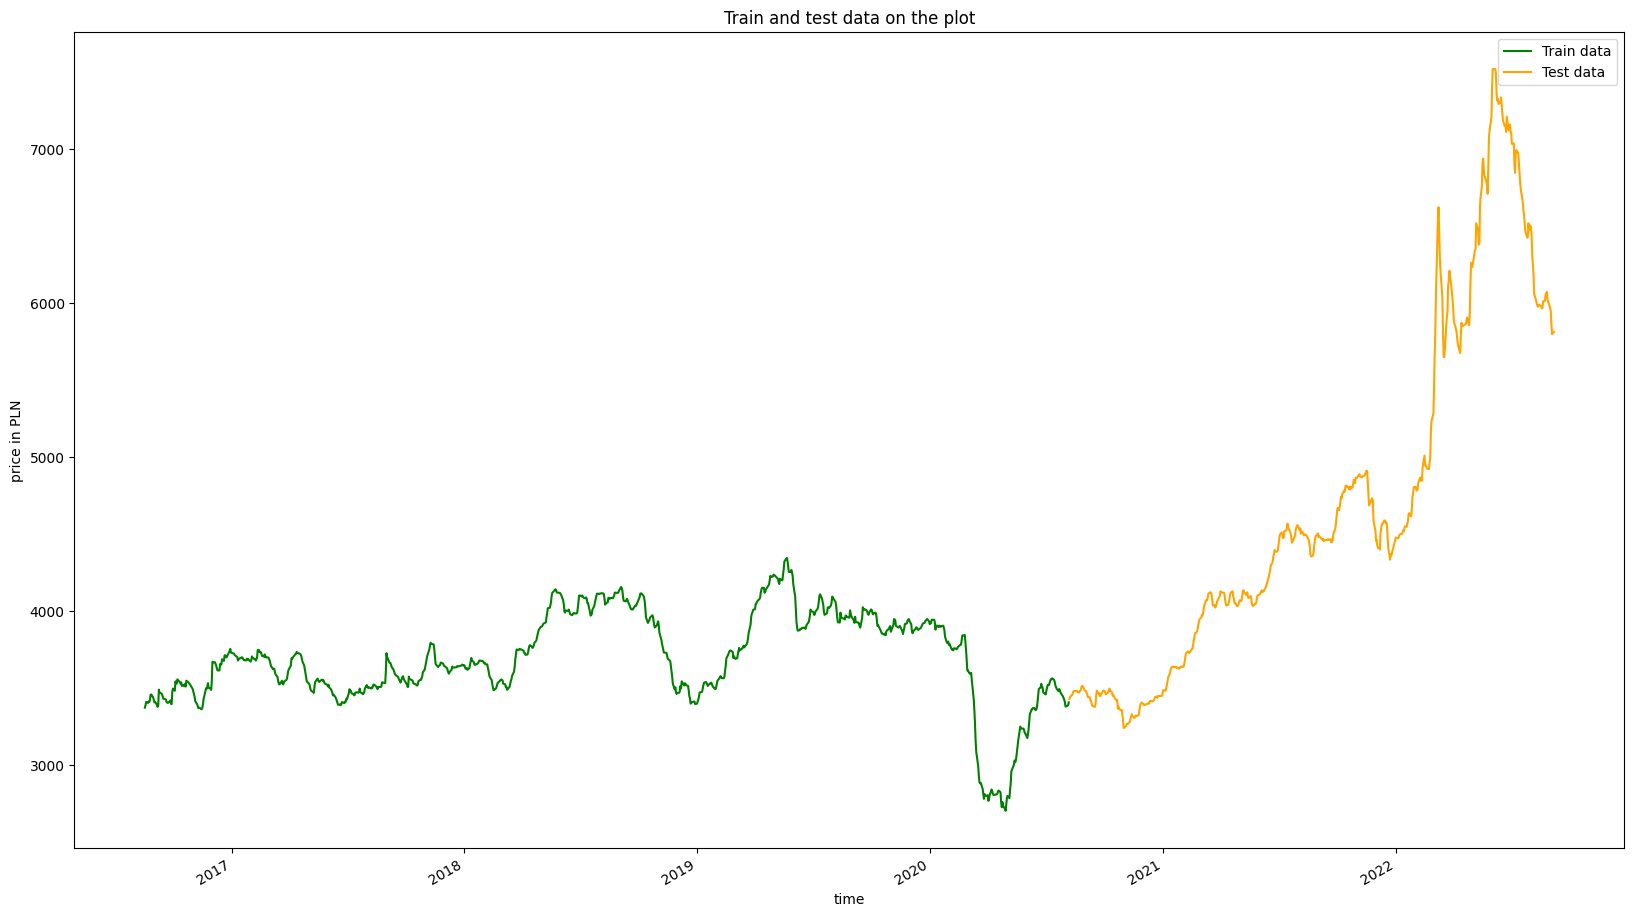

In [16]:
train, test = working[0: int(len(working)*0.65)], working[int(len(working)*0.65):]

plt.plot(train["Date"], train["Price"], color = "green", label = "Train data")
plt.plot(test["Date"], test["Price"], color = "orange", label = "Test data")
plt.rcParams['figure.figsize'] = [20, 12]

locator = mdate.YearLocator()
plt.gca().xaxis.set_major_locator(locator)

plt.gcf().autofmt_xdate()

plt.xlabel("time")
plt.ylabel("price in PLN")
plt.title("Train and test data on the plot")
plt.legend()
plt.show()

In [18]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
train, test = working[0: int(len(working)*0.65)], working[int(len(working)*0.65):]
train = train["Price"].values
test = test["Price"].values

In [21]:
history = [x for x in train]
predictions = []
test_set_size = len(test)

# ARIMA parameters

p=4
d=1
q=0

for time_point in range (test_set_size):
    model = ARIMA(history, order= (p,d,q))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    true_value = test[time_point]
    history.append(true_value)


In [28]:
MSE = sum((test - predictions)**2)/test_set_size
RMSE = MSE**0.5
print(f'MSE = {MSE} \nRMSE = {RMSE}')

MSE = 2252.2950806332838 
RMSE = 47.458351010473216
